In [1]:
import numpy as np
import pandas as pd
import os

# Words workflow

#### Read in data

In [2]:
data_list = []

with open("data_in/iamHandwriting/ascii/words.txt") as f:
    for line in f:
        if line[0] == "#":
            continue
        line = line.replace("\n", "")
        l_split = line.split(" ", 8)
        
        data_dict = dict()
        data_dict["wordID"] = l_split[0]
        data_dict["segmentation"] = l_split[1]
        data_dict["bin_thresh"] = int(l_split[2])
        data_dict["x_bound"] = int(l_split[3])
        data_dict["y_bound"] = int(l_split[4])
        data_dict["w_bound"] = int(l_split[5])
        data_dict["h_bound"] = int(l_split[6])
        data_dict["grammar"] = l_split[7]
        data_dict["transcription"] = l_split[8]
        data_list.append(data_dict)

data_df = pd.DataFrame(data_list)
data_df = data_df[["wordID", "transcription",
                   "segmentation", "bin_thresh", "x_bound", "y_bound",
                   "w_bound", "h_bound", "grammar"]]

#### Add new columns

In [3]:
# location columns
data_df["prefix"] = [x.split("-")[0] for x in data_df["wordID"]]
data_df["form"] = ["-".join([x.split("-")[0], x.split("-")[1]])
                            for x in data_df["wordID"]]
local_path = os.getcwd().replace("\\", "/") + "/"
data_df["path"] = local_path + "data_in/iamHandwriting/words/" + data_df["prefix"] + "/" + data_df["form"] + "/" + data_df["wordID"] + ".png"

#### Find freqency of letters

In [6]:
letters = dict()

for tran in data_df.transcription:
    for l in list(tran):
        if l not in letters:
            letters[l] = 0
        letters[l] += 1
letters = sorted(letters.items(), key = lambda f: f[1], reverse=True)
# print(letters)

[('|', 101967), ('e', 56911), ('t', 39972), ('a', 35849), ('o', 33343), ('n', 31027), ('i', 30300), ('s', 27867), ('r', 27516), ('h', 25244), ('l', 18036), ('d', 17952), ('u', 12203), ('c', 11823), ('m', 10642), ('f', 10006), ('w', 8808), ('g', 8653), ('y', 8264), ('p', 8253), ('b', 6803), ('.', 6224), (',', 5629), ('v', 4528), ('k', 2819), ("'", 1987), ('T', 1652), ('"', 1629), ('I', 1600), ('-', 1545), ('A', 1257), ('M', 1144), ('S', 1064), ('H', 988), ('B', 854), ('x', 785), ('C', 750), ('W', 728), ('P', 722), ('N', 711), ('E', 675), ('G', 661), ('L', 638), ('R', 606), ('D', 569), ('1', 494), ('F', 489), ('O', 469), ('0', 431), ('j', 423), ('q', 370), ('?', 259), ('Y', 227), ('!', 226), ('2', 209), ('z', 205), (';', 204), ('(', 203), (')', 200), ('U', 189), ('J', 181), ('9', 179), ('3', 174), ('V', 171), (':', 165), ('K', 163), ('5', 157), ('6', 121), ('8', 118), ('4', 118), ('#', 79), ('7', 64), ('&', 55), (' ', 49), ('Q', 16), ('/', 16), ('*', 14), ('Z', 10), ('+', 9), ('X', 8)]


#### Get rid of unwanted rows

In [5]:
w95 = np.percentile(data_df.w_bound, 95)
h95 = np.percentile(data_df.h_bound, 95)
print(w95, h95)

# size columns
import matplotlib.pyplot as plt
plt.subplot(211)
plt.hist(data_df.w_bound)
plt.axvline(x=w95, color="r")
plt.subplot(212)
plt.hist(data_df.h_bound)
plt.axvline(x=h95, color="r")
plt.show()

369.0 129.0


In [6]:
# get rid of the really big images
data_df = data_df[np.logical_and(data_df.w_bound < w95, data_df.h_bound < h95)]

# image is broken
data_df = data_df[data_df.wordID != "r06-022-03-05"]

# get only words that are entirely lowercase letters
data_df["lower"] = [all([y.islower() for y in x]) 
                     for x in data_df["transcription"]]

data_df = data_df[data_df["lower"]].loc[:,["path", "transcription"]]

#### Save only lowercase words

In [9]:
data_df.to_csv("./data/train.csv", sep="\t", index=False)

# Lines workflow

#### Read in data

In [2]:
data_list = []

with open("data_in/iamHandwriting/ascii/lines.txt") as f:
    for line in f:
        if line[0] == "#":
            continue
        line = line.replace("\n", "")
        l_split = line.split(" ", 8)
        
        data_dict = dict()
        data_dict["lineID"] = l_split[0]
        data_dict["segmentation"] = l_split[1]
        data_dict["bin_thresh"] = int(l_split[2])
        data_dict["n_components"] = int(l_split[3])
        data_dict["x_bound"] = int(l_split[4])
        data_dict["y_bound"] = int(l_split[5])
        data_dict["w_bound"] = int(l_split[6])
        data_dict["h_bound"] = int(l_split[7])
        data_dict["transcription"] = " ".join(l_split[8].split("|"))
        data_list.append(data_dict)

data_df = pd.DataFrame(data_list)
data_df = data_df[["lineID", "transcription",
                   "segmentation", "bin_thresh", "x_bound", "y_bound",
                   "w_bound", "h_bound", "n_components"]]

#### Add new columns

In [3]:
# location columns
data_df["prefix"] = [x.split("-")[0] for x in data_df["lineID"]]
data_df["form"] = ["-".join([x.split("-")[0], x.split("-")[1]])
                            for x in data_df["lineID"]]
local_path = os.getcwd().replace("\\", "/") + "/data_in/iamHandwriting/lines/"
data_df["path"] = local_path + data_df["prefix"] + "/" + data_df["form"] + "/" + data_df["lineID"] + ".png"

#### Find freqency of letters

In [5]:
letters = dict()

for tran in data_df.transcription:
    for l in list(tran):
        if l not in letters:
            letters[l] = 0
        letters[l] += 1
letters = sorted(letters.items(), key = lambda f: f[1], reverse=True)
print(letters)

[(' ', 102016), ('e', 56911), ('t', 39972), ('a', 35849), ('o', 33343), ('n', 31027), ('i', 30300), ('s', 27867), ('r', 27516), ('h', 25244), ('l', 18036), ('d', 17952), ('u', 12203), ('c', 11823), ('m', 10642), ('f', 10006), ('w', 8808), ('g', 8653), ('y', 8264), ('p', 8253), ('b', 6803), ('.', 6224), (',', 5629), ('v', 4528), ('k', 2819), ("'", 1987), ('T', 1652), ('"', 1629), ('I', 1600), ('-', 1545), ('A', 1257), ('M', 1144), ('S', 1064), ('H', 988), ('B', 854), ('x', 785), ('C', 750), ('W', 728), ('P', 722), ('N', 711), ('E', 675), ('G', 661), ('L', 638), ('R', 606), ('D', 569), ('1', 494), ('F', 489), ('O', 469), ('0', 431), ('j', 423), ('q', 370), ('?', 259), ('Y', 227), ('!', 226), ('2', 209), ('z', 205), (';', 204), ('(', 203), (')', 200), ('U', 189), ('J', 181), ('9', 179), ('3', 174), ('V', 171), (':', 165), ('K', 163), ('5', 157), ('6', 121), ('8', 118), ('4', 118), ('#', 79), ('7', 64), ('&', 55), ('Q', 16), ('/', 16), ('*', 14), ('Z', 10), ('+', 9), ('X', 8)]


#### Get rid of unwanted rows

1969.0 183.0


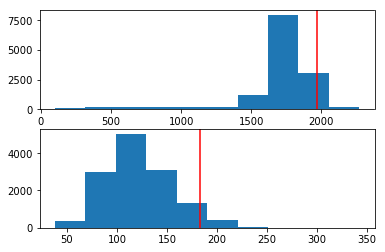

In [6]:
w95 = np.percentile(data_df.w_bound, 95)
h95 = np.percentile(data_df.h_bound, 95)
print(w95, h95)

# size columns
import matplotlib.pyplot as plt
plt.subplot(211)
plt.hist(data_df.w_bound)
plt.axvline(x=w95, color="r")
plt.subplot(212)
plt.hist(data_df.h_bound)
plt.axvline(x=h95, color="r")
plt.show()

In [9]:
# get rid of the really big images
data_df = data_df[np.logical_and(data_df.w_bound < w95, data_df.h_bound < h95)]

# get only words that are entirely lowercase letters
data_df["lower"] = [all([y.islower() for y in x]) 
                     for x in data_df["transcription"]]

data_df = data_df[["path", "transcription"]]

#### Save only lowercase words

In [11]:
data_df.to_csv("./data/train.csv", sep="\t", index=False)